# Análisis exploratorio de datos de Turismo

En este notebook se presenta el análisis de datos principal para el conjunto de datos de turismo ordenado.

> Para ver la forma de los datos originales y la limpieza de datos, favor de revisar el archivo 'data_diagnosis.ipynb'.

Librerias

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Paleta de colores

In [3]:
# Definir paleta de colores
palette = {
    'black': '#2D2D2D',
    'orange': '#FF4500',
    'white': '#FAFAFA'
}

# Configuración de estilo de Seaborn
sns.set(style='whitegrid', palette='bright', font_scale=1.2)

# Función para aplicar el estilo a todos los gráficos
def apply_style():
    plt.rcParams['axes.facecolor'] = palette['white']
    plt.rcParams['axes.edgecolor'] = palette['black']
    plt.rcParams['axes.labelcolor'] = palette['black']
    plt.rcParams['xtick.color'] = palette['black']
    plt.rcParams['ytick.color'] = palette['black']
    plt.rcParams['grid.color'] = palette['black']
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['grid.alpha'] = 0.5
    plt.rcParams['font.size'] = 14  # Aumentar el tamaño de la fuente
    plt.rcParams['font.weight'] = 'bold'  # Hacer la fuente en negrita
    plt.rcParams['legend.fontsize'] = 12  # Tamaño de la fuente de la leyenda
    plt.rcParams['axes.titlesize'] = 16  # Tamaño del título del eje
    plt.rcParams['axes.labelsize'] = 14  # Tamaño de las etiquetas de los ejes

# Aplicar el estilo
apply_style()

In [4]:
datos = pd.read_csv("datos.csv")

datos

,Fecha,Periodo,Año,Mes,Asset Code,N° Noches,N° Pasajeros,Mascota,Canal de Venta,Precio x Noche,Precio [$CLP] IVA Inc,Tax Booking,Clean Up,IVA 19%,Medio de Pago,Boleta/Factura,Pago en USD,Precio [$CLP] Neto
0,2022-01-02,2022-01,2022,Enero,C1,1,5,0,Venta Directa,70000.000,70000.0,0.000000,1,11176.470588,TEF,BOL,0,58823.529412
1,2022-01-04,2022-01,2022,Enero,C1,1,5,0,Airbnb,75000.000,75000.0,2677.500000,1,11974.789916,TEF,BOL,0,63025.210084
2,2022-01-05,2022-01,2022,Enero,C1,1,5,0,Venta Directa,75000.000,75000.0,0.000000,1,11974.789916,TEF,BOL,0,63025.210084
3,2022-01-06,2022-01,2022,Enero,C1,1,6,0,Booking,97104.000,97104.0,13566.000000,1,15504.000000,TEF,BOL,1,81600.000000
4,2022-01-11,2022-01,2022,Enero,C1,1,5,0,Booking,92248.000,92248.0,12887.588235,1,14728.672269,TEF,BOL,1,77519.327731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2024-09-13,2024-09,2024,Septiembre,C1,2,4,0,Booking,201457.000,402914.0,47401.647059,0,64330.806723,Transbank,BOL,1,338583.193277
373,2024-09-14,2024-09,2024,Septiembre,C2,3,7,0,Venta Directa,150000.000,450000.0,0.000000,0,71848.739496,Transbank,BOL,0,378151.260504
374,2024-09-18,2024-09,2024,Septiembre,C2,1,4,0,Airbnb,330000.000,330000.0,11781.000000,0,52689.075630,Transbank,BOL,0,277310.924370
375,2024-09-18,2024-09,2024,Septiembre,C1,4,6,0,Booking,231674.125,926696.5,109023.117647,0,147959.945378,Transbank,BOL,1,778736.554622


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Año                    377 non-null    int64  
 1   Mes                    377 non-null    object 
 2   Asset Code             377 non-null    object 
 3   N° Noches              377 non-null    int64  
 4   N° Pasajeros           377 non-null    int64  
 5   Mascota                377 non-null    int64  
 6   Canal de Venta         377 non-null    object 
 7   Precio x Noche         377 non-null    float64
 8   Precio [$CLP] IVA Inc  377 non-null    float64
 9   Tax Booking            377 non-null    float64
 10  Clean Up               377 non-null    int64  
 11  IVA 19%                377 non-null    float64
 12  Precio [$CLP] Neto     377 non-null    float64
 13  Medio de Pago          377 non-null    object 
 14  Boleta/Factura         377 non-null    object 
 15  Pago e

In [5]:
print(f'El dataframe contiene {datos.shape[0]} observaciones y {datos.shape[1]} columnas.')

El dataframe contiene 377 observaciones y 18 columnas.


Observemos la distribución de las variables:

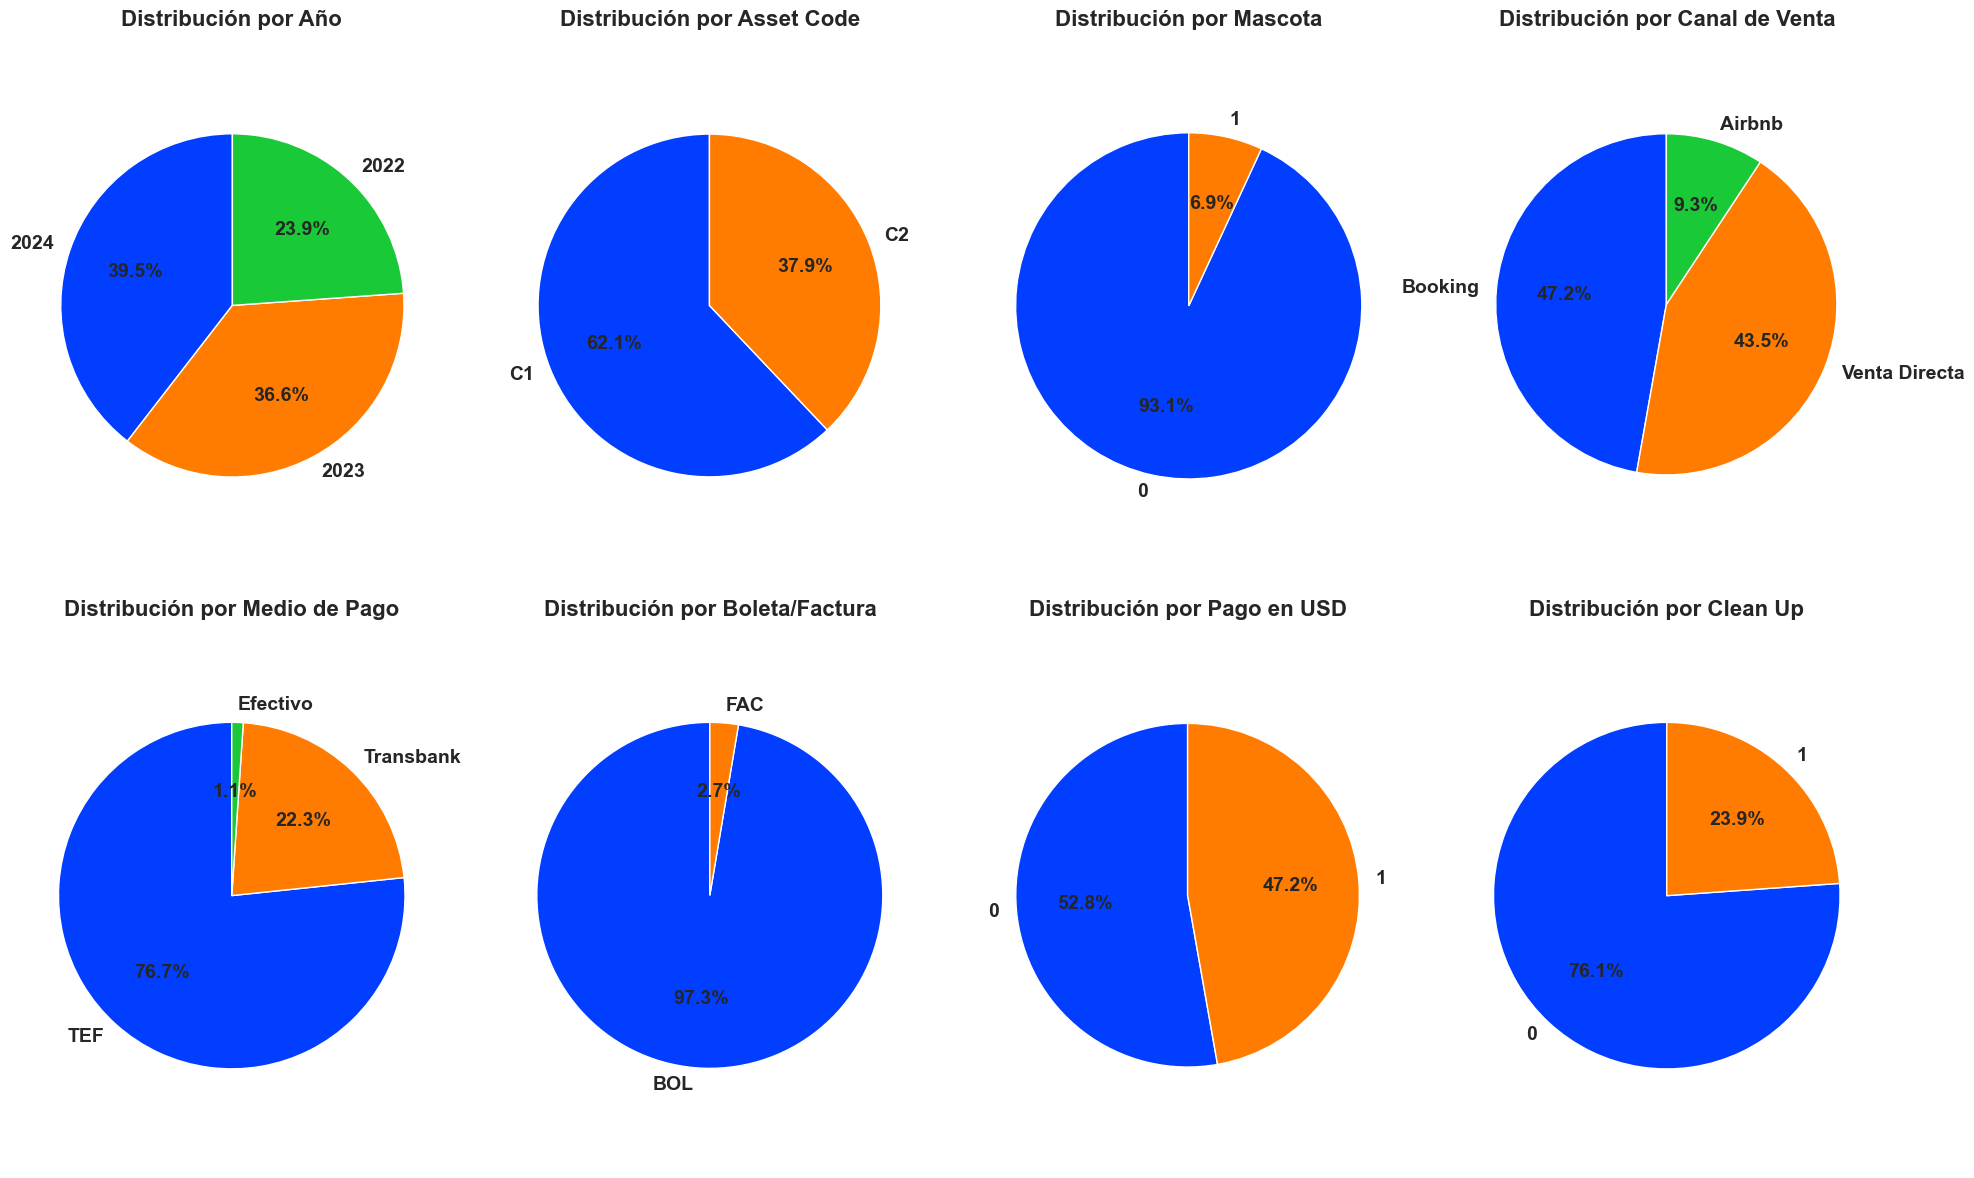

In [6]:
# Lista de columnas para gráficos de torta
columns_to_plot_pie = [
    'Año',
    'Asset Code', 
    'Mascota', 
    'Canal de Venta', 
    'Medio de Pago', 
    'Boleta/Factura', 
    'Pago en USD',
    'Clean Up'
]

# Crear una grilla 2x4
fig, axes = plt.subplots(2, 4, figsize=(20, 12))

# Crear gráficos de torta para cada columna
for i, column in enumerate(columns_to_plot_pie):
    # Contar la cantidad de observaciones por cada categoría en la columna
    counts = datos[column].value_counts()

    # Determinar la fila y columna de la grilla
    row, col = divmod(i, 4)
    
    # Crear el gráfico de torta en la subtrama correspondiente
    axes[row, col].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 14}
    )  
    axes[row, col].set_title(f'Distribución por {column}', fontsize=16, fontweight='bold')  # Aumentar tamaño del título y poner en negrita
    axes[row, col].axis('equal')  # Para que el gráfico de torta sea circular

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

In [46]:
# # Lista de columnas para gráficos de torta
# columns_to_plot_pie = [
#     'Año',
#     'Asset Code', 
#     'Mascota', 
#     'Canal de Venta', 
#     'Medio de Pago', 
#     'Boleta/Factura', 
#     'Pago en USD',
#     'Clean Up'
# ]

# # Configuración de estilo de Seaborn
# sns.set_theme(style="whitegrid")

# # Crear gráficos de torta para cada columna
# for column in columns_to_plot_pie:
#     plt.figure(figsize=(8, 8))
    
#     # Contar la cantidad de observaciones por cada categoría en la columna
#     counts = datos[column].value_counts()
    
#     # Crear el gráfico de torta
#     plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
#     plt.title(f'Distribución de Observaciones por {column}')
#     plt.axis('equal')  # Para que el gráfico de torta sea un círculo
#     plt.show()

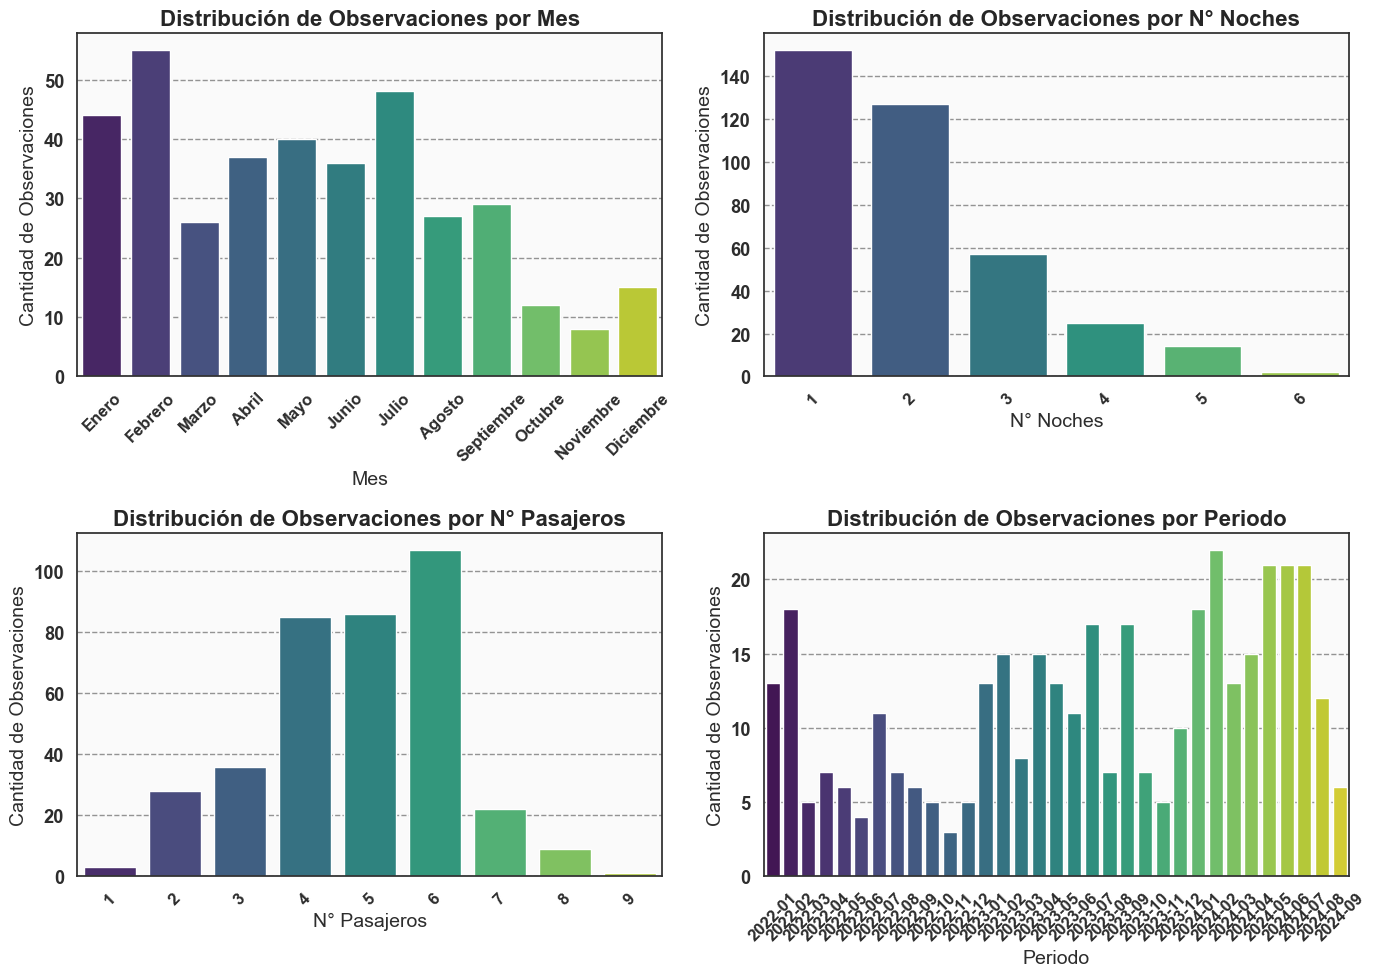

In [7]:
# Asegúrate de que la columna "Mes" es un tipo categórico con un orden específico
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
datos['Mes'] = pd.Categorical(datos['Mes'], categories=meses_ordenados, ordered=True)

# Lista de columnas para gráficos de barras
columns_to_plot_bar = [
    'Mes',
    'N° Noches', 
    'N° Pasajeros',
    'Periodo'
]

# Crear una grilla 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Crear gráficos de barras para cada columna
for i, column in enumerate(columns_to_plot_bar):
    # Contar la cantidad de observaciones por cada categoría en la columna
    counts = datos[column].value_counts().sort_index()
    
    # Crear el gráfico de barras en la subtrama correspondiente
    sns.barplot(x=counts.index, y=counts.values, palette='viridis', ax=axes[i // 2, i % 2])
    
    # Ajustar título, etiquetas, etc.
    axes[i // 2, i % 2].set_title(f'Distribución de Observaciones por {column}', fontsize=16, fontweight='bold')  # Aumentar tamaño del título
    axes[i // 2, i % 2].set_xlabel(column, fontsize=14)  # Aumentar tamaño de la etiqueta del eje x
    axes[i // 2, i % 2].set_ylabel('Cantidad de Observaciones', fontsize=14)  # Aumentar tamaño de la etiqueta del eje y
    axes[i // 2, i % 2].tick_params(axis='x', rotation=45, labelsize=12)  # Aumentar tamaño de las etiquetas del eje x

# Ajustar el layout para que los gráficos no se superpongan
plt.tight_layout()
plt.show()

In [48]:
# # Lista de columnas para gráficos de barras
# columns_to_plot_bar = [
#     'Mes',
#     'N° Noches', 
#     'N° Pasajeros'
# ]

# # Crear gráficos de barras para cada columna
# for column in columns_to_plot_bar:
#     plt.figure(figsize=(10, 6))
    
#     # Contar la cantidad de observaciones por cada categoría en la columna
#     counts = datos[column].value_counts().sort_index()
    
#     # Crear el gráfico de barras
#     sns.barplot(x=counts.index, y=counts.values, palette='viridis')
#     plt.title(f'Distribución de Observaciones por {column}')
#     plt.xlabel(column)
#     plt.ylabel('Cantidad de Observaciones')
#     plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
#     plt.show()

Observemos algunas distribuciones conjuntas

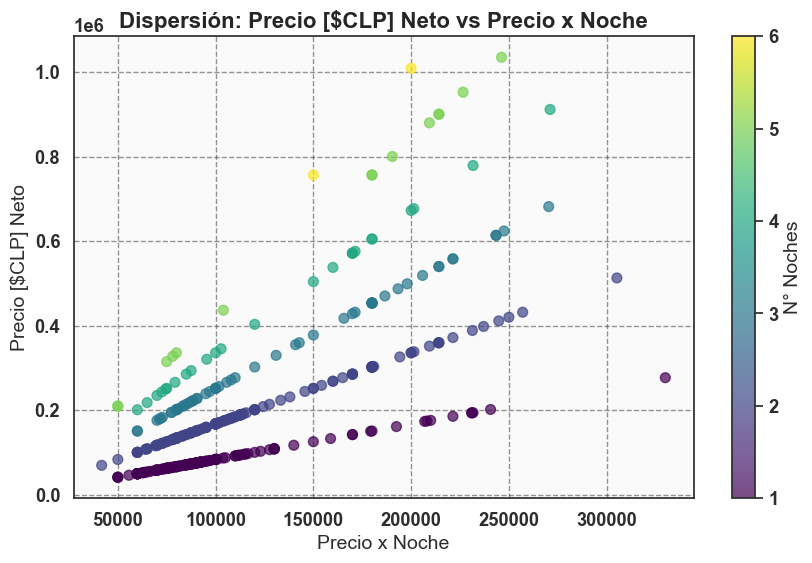

In [49]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión, con los puntos diferenciados por "N° Noches" (que es entero)
scatter = plt.scatter(
    datos['Precio x Noche'], datos['Precio [$CLP] Neto'], 
    c=datos['N° Noches'], cmap='viridis', s=50, alpha=0.7
)

# Añadir barra de colores para indicar el valor de "N° Noches"
plt.colorbar(scatter, label='N° Noches')

# Añadir etiquetas y título
plt.title('Dispersión: Precio [$CLP] Neto vs Precio x Noche', fontweight='bold')
plt.xlabel('Precio x Noche')
plt.ylabel('Precio [$CLP] Neto')

# Mostrar la gráfica
plt.grid(True)
plt.show()


In [50]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Crear la grilla de 2x2
# fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# # Gráfico 1: Colorear por "N° Noches"
# scatter1 = axes[0, 0].scatter(
#     datos['Precio x Noche'], datos['Precio [$CLP] Neto'], 
#     c=datos['N° Noches'], cmap='coolwarm', s=50, alpha=0.7
# )
# axes[0, 0].set_title('Color por N° Noches')
# axes[0, 0].set_xlabel('Precio x Noche')
# axes[0, 0].set_ylabel('Precio [$CLP] Neto')
# plt.colorbar(scatter1, ax=axes[0, 0], label='N° Noches')

# # Gráfico 2: Colorear por "Pago en USD"
# scatter2 = axes[0, 1].scatter(
#     datos['Precio x Noche'], datos['Precio [$CLP] Neto'], 
#     c=datos['Pago en USD'], cmap='viridis', s=50, alpha=0.7
# )
# axes[0, 1].set_title('Color por Pago en USD')
# axes[0, 1].set_xlabel('Precio x Noche')
# plt.colorbar(scatter2, ax=axes[0, 1], label='Pago en USD')

# # Gráfico 3: Colorear por "Canal de Venta"
# # Aseguramos que "Canal de Venta" sea una variable categórica y asignamos colores
# scatter3 = axes[1, 0].scatter(
#     datos['Precio x Noche'], datos['Precio [$CLP] Neto'], 
#     c=pd.factorize(datos['Canal de Venta'])[0], cmap='Set1', s=50, alpha=0.7
# )
# axes[1, 0].set_title('Color por Canal de Venta')
# axes[1, 0].set_xlabel('Precio x Noche')
# plt.colorbar(scatter3, ax=axes[1, 0], label='Canal de Venta')

# # Gráfico 4: Colorear por "Medio de Pago"
# # Aseguramos que "Medio de Pago" sea una variable categórica y asignamos colores
# scatter4 = axes[1, 1].scatter(
#     datos['Precio x Noche'], datos['Precio [$CLP] Neto'], 
#     c=pd.factorize(datos['Medio de Pago'])[0], cmap='Paired', s=50, alpha=0.7
# )
# axes[1, 1].set_title('Color por Medio de Pago')
# axes[1, 1].set_xlabel('Precio x Noche')
# plt.colorbar(scatter4, ax=axes[1, 1], label='Medio de Pago')

# # Ajustar el layout para que los gráficos no se superpongan
# plt.tight_layout()
# plt.show()

Veamos ahora valores pero según el periodo Año-Mes:

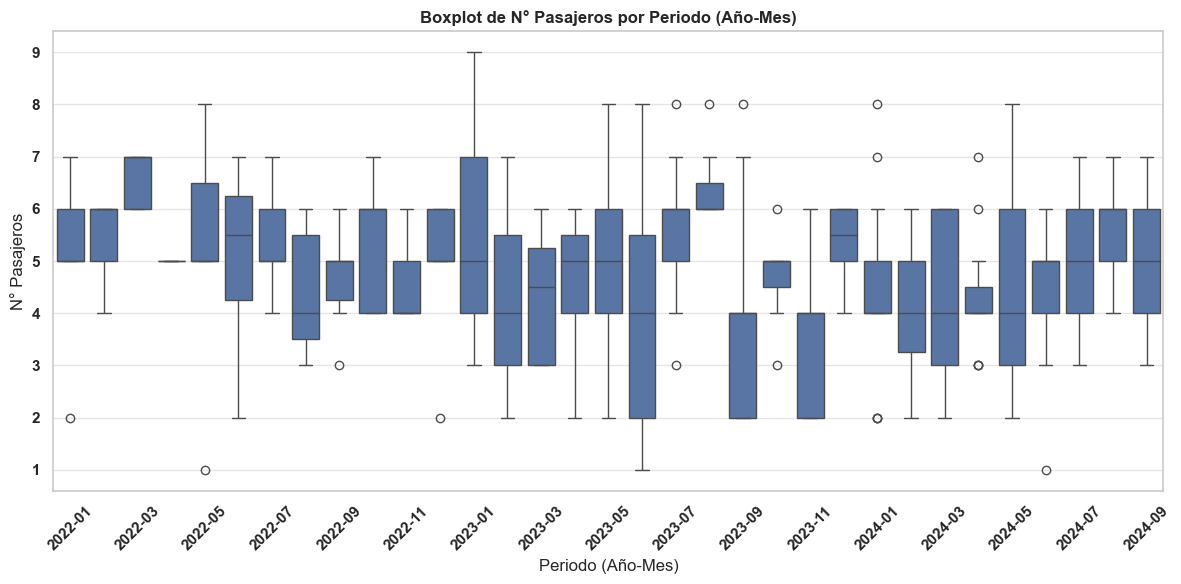

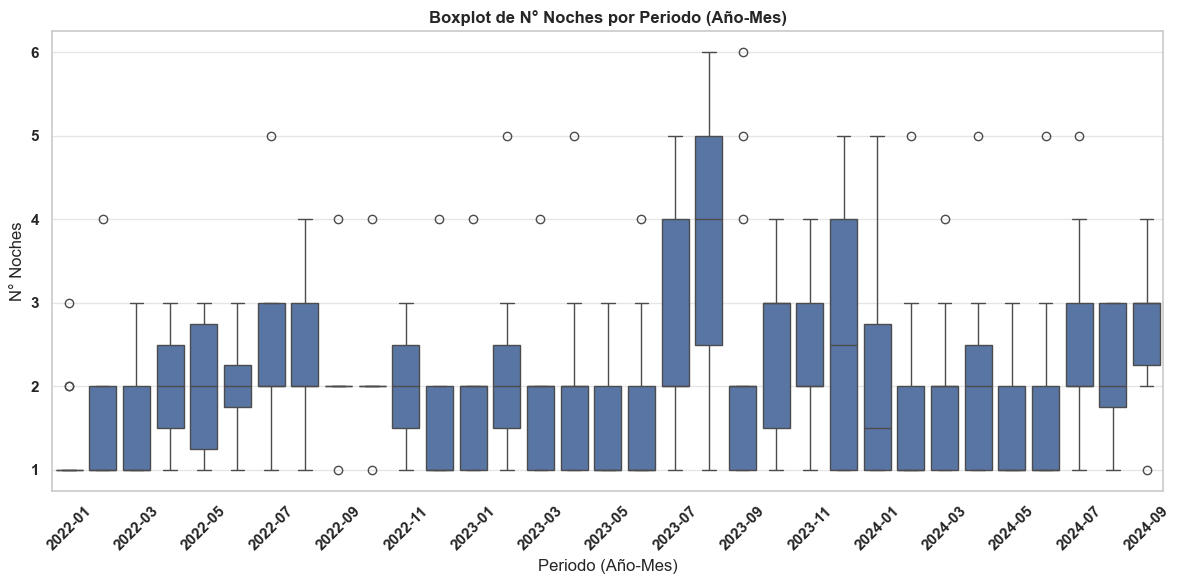

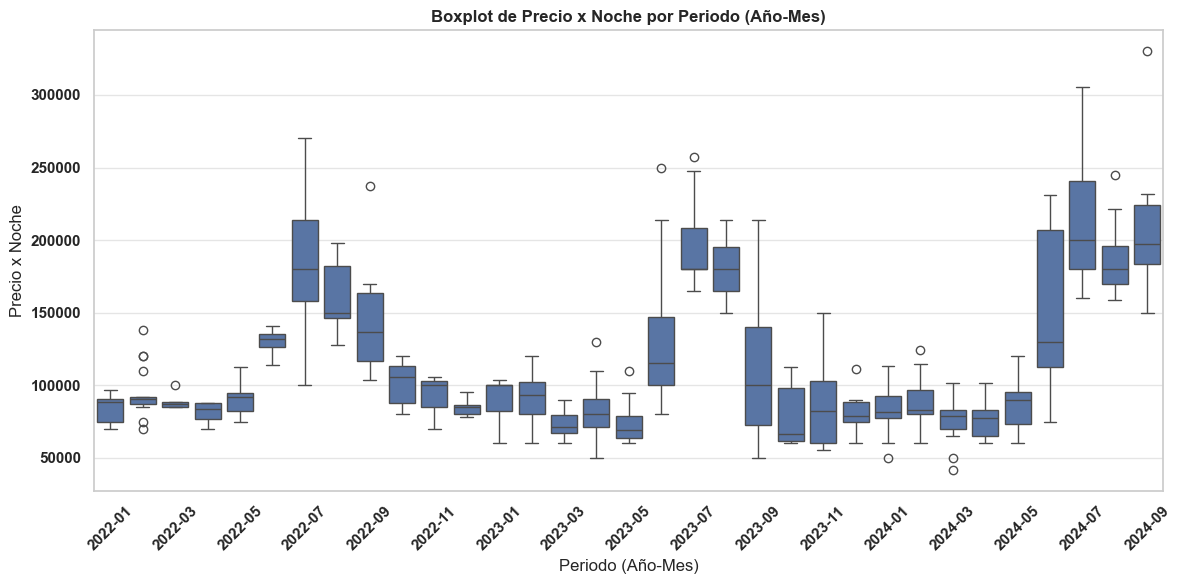

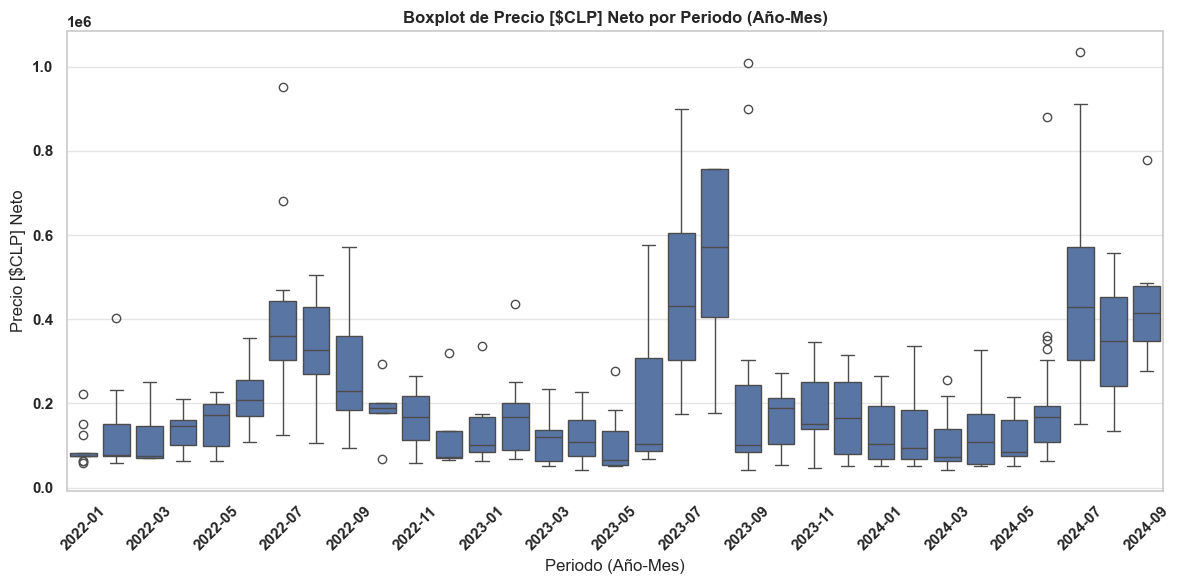

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
sns.set_theme(style="whitegrid")

# Lista de columnas y títulos
columns = [
    ('N° Pasajeros', 'Boxplot de N° Pasajeros por Periodo (Año-Mes)'),
    ('N° Noches', 'Boxplot de N° Noches por Periodo (Año-Mes)'),
    ('Precio x Noche', 'Boxplot de Precio x Noche por Periodo (Año-Mes)'),
    ('Precio [$CLP] Neto', 'Boxplot de Precio [$CLP] Neto por Periodo (Año-Mes)')
]

# Crear un gráfico para cada boxplot
for i, (column, title) in enumerate(columns):
    plt.figure(figsize=(12, 6))  # Cambiar tamaño del gráfico
    sns.boxplot(x='Periodo', y=column, data=datos)
    
    plt.title(title, fontweight='bold')
    plt.xlabel('Periodo (Año-Mes)')
    plt.ylabel(column)
    plt.tick_params(axis='x', rotation=45)
    plt.xticks(ticks=plt.xticks()[0][::2])  # Mostrar cada 2 ticks en el eje X

    # Ajustar el layout para que no se superpongan
    plt.tight_layout()
    plt.show()